In [1]:
# Interactive Goal Model Evaluation - Jupyter Notebook
# Run each cell sequentially to set up the interactive environment

# Cell 1: Setup and Imports
import json
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import networkx as nx
import numpy as np
from enum import Enum
from typing import Dict, List, Tuple, Set
import pandas as pd

In [2]:
# Add your Implementation directory to the path
# Adjust this path to match your project structure
import os
import sys
project_root = os.path.abspath(".")  # Current directory
implementation_path = os.path.join(project_root, "Implementation")
app_path = os.path.join(project_root, "App")

# Add paths to sys.path so we can import your modules
if implementation_path not in sys.path:
    sys.path.append(implementation_path)
if app_path not in sys.path:
    sys.path.append(app_path)

print(f"Project root: {project_root}")
print(f"Implementation path: {implementation_path}")
print(f"App path: {app_path}")
print("Paths configured!")


Project root: /Users/huba/tmp/Kogi-Python
Implementation path: /Users/huba/tmp/Kogi-Python/Implementation
App path: /Users/huba/tmp/Kogi-Python/App
Paths configured!


In [3]:
# Cell 2: Import Your Existing Code
try:
    # Import your enums
    from enums import ElementStatus, QualityStatus, LinkType, LinkStatus
    print(" Enums imported successfully")
    
    # Import your GoalModel class
    from goal_model import GoalModel
    print(" GoalModel imported successfully")
    
    # Try to import the main app logic (adjust the import based on your file structure)
    # If you have the main evaluation logic in a separate file, import it here
    try:
        import main_evaluation  # Adjust this to your actual file name
        print(" Main evaluation module imported")
    except ImportError:
        print(" Main evaluation module not found - will use direct GoalModel")
    
except ImportError as e:
    print(f" Import error: {e}")
    print(" Please ensure your files are in the correct directory structure:")
    print("   - Implementation/enums.py")
    print("   - Implementation/goal_model.py")
    print("   - App/main_evaluation.py (or similar)")
    raise

print(" All imports successful!")

 Enums imported successfully
 GoalModel imported successfully
 Main evaluation module not found - will use direct GoalModel
 All imports successful!


In [4]:
# Cell 3: Model Creation Function 
def create_model_from_your_code():
    """Create the goal model using your existing create_model function logic"""
    model = GoalModel()  
    
    # Add tasks 
    tasks = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]
    for task in tasks:
        model.add_task(task)
    
    # Add goals 
    goals = ["G1", "G2", "G3"]
    for goal in goals:
        model.add_goal(goal)
    
    # Add quality 
    model.add_quality("Q1")
    
    # Add links (from your code)
    model.add_link("G3", "T8", LinkType.AND)
    model.add_link("T1", "T6", LinkType.AND)
    model.add_link("G1", "T2", LinkType.OR)
    model.add_link("Q1", "G2", LinkType.BREAK)
    model.add_link("Q1", "G1", LinkType.MAKE)
    model.add_link("G1", "T1", LinkType.OR)
    model.add_link("G3", "T1", LinkType.AND)
    model.add_link("T1", "T7", LinkType.AND)
    model.add_link("G2", "T3", LinkType.AND)
    model.add_link("G2", "T5", LinkType.AND)
    model.add_link("G2", "T4", LinkType.AND)
    
    # Add requirements (from your code)
    model.requirements = {
        "G3": [['T8', 'T1']],
        "T1": [['T6', 'T7']],
        "G1": [['T2'], ['T1']],
        "G2": [['T3', 'T5', 'T4']]
    }
    
    # Add event mappings (process transitions from your code)
    events = {
        "e1": "T1", 
        "e2": "T2", 
        "e3": [["T3"]],
        "e4": "T4", 
        "e5": "T5", 
        "e6": "T6",
        "e7": "T7", 
        "e8": "T8"
    }
    for event, target in events.items():
        model.add_event_mapping(event, target)
    
    print(" Model created using your existing logic!")
    return model

# Create model instance using your code
model = create_model_from_your_code()

 Model created using your existing logic!


In [5]:
# Cell 3a: Model Creation Function 
def create_model_hubert():
    """Create the goal model using your existing create_model function logic"""
    model = GoalModel()  
    
    # Add tasks 
    tasks = ["T1"]
    for task in tasks:
        model.add_task(task)
    
    # Add goals 
    goals = []
    for goal in goals:
        model.add_goal(goal)
    
    # Add quality 
    model.add_quality("Q1")
    
    # Add links (from your code)
    model.add_link("Q1", "T1", LinkType.MAKE)
    
    # Add requirements (from your code)
    model.requirements = {
    }
    
    # Add event mappings (process transitions from your code)
    events = {
        "e1": "T1", 
        "e2": "T2", 
        "e3": "T3",
        "e4": "T4", 
        "e5": "T5", 
        "e6": "T6",
        "e7": "T7", 
        "e8": "T8"
    }
    for event, target in events.items():
        model.add_event_mapping(event, target)
    
    print(" Model created using your existing logic!")
    return model

# Create model instance using your code
model = create_model_hubert()

 Model created using your existing logic!


In [ ]:

# Cell 4: Visualization Functions (adapted to work with your GoalModel)
def get_status_color_from_your_model(element_id):
    """Get color based on element status using your model's data structures"""
    print(element_id)
    if element_id in model.qualities:
        status = model.qualities[element_id]
        if status.value == QualityStatus.UNKNOWN.value:
            return 'white'
        elif status.value == QualityStatus.FULFILLED.value:
            return 'lightgreen'
        elif status.value == QualityStatus.DENIED.value:
            return 'lightcoral'
    else:
        status = model.tasks.get(element_id) or model.goals.get(element_id)
        if status.value == ElementStatus.UNKNOWN.value:
            return 'white'
        elif status.value == ElementStatus.TRUE_FALSE.value:
            return 'lightgreen'
        elif status.value == ElementStatus.TRUE_TRUE.value:
            return 'lightblue'
    return 'black'

def create_goal_model_visualization():
    """Create visualization using your actual GoalModel data"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left side: Goal Model Structure
    ax1.set_title("Goal Model Structure", fontsize=14, fontweight='bold')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_aspect('equal')
    
    # Define positions for elements
    positions = {
        'Q1': (5, 9),
        'G1': (2, 7), 'G2': (5, 7), 'G3': (8, 7),
        'T1': (1, 5), 'T2': (3, 5), 'T3': (4, 5), 'T4': (5, 5),
        'T5': (6, 5), 'T6': (1, 3), 'T7': (2, 3), 'T8': (8, 3)
    }
    
    # Draw elements using your model's actual data
    for element_id, (x, y) in positions.items():
        color = get_status_color_from_your_model(element_id)
        
        if element_id.startswith('Q'):
            # Quality - cloud shape
            cloud = FancyBboxPatch((x-0.4, y-0.3), 0.8, 0.6, 
                                 boxstyle="round,pad=0.1", 
                                 facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(cloud)
            # Show actual status from your model
            status_text = f"{element_id}\n{model._format_status(model.qualities[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
        elif element_id.startswith('G'):
            # Goal - ellipse
            ellipse = patches.Ellipse((x, y), 0.8, 0.5, 
                                    facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(ellipse)
            status_text = f"{element_id}\n{model._format_status(model.goals[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            # Task - hexagon
            hexagon = patches.RegularPolygon((x, y), 6, radius=0.4, 
                                          facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(hexagon)
            status_text = f"{element_id}\n{model._format_status(model.tasks[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
    
    # Draw links using your model's actual links
    for parent, child, link_type, status in model.links:
        if parent in positions and child in positions:
            px, py = positions[parent]
            cx, cy = positions[child]
            
            # Determine arrow style based on link type from your enums
            if link_type == LinkType.MAKE:
                color = 'green'
                style = '->'
            elif link_type == LinkType.BREAK:
                color = 'red'
                style = '->'
            else:
                color = 'blue'
                style = '->'
            
            ax1.annotate('', xy=(cx, cy), xytext=(px, py),
                        arrowprops=dict(arrowstyle=style, color=color, lw=2))
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Right side: Process Model with Mappings (using your event_mapping)
    ax2.set_title("Process Model & Event Mappings", fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    
    # Draw process transitions using your actual event mappings
    events = list(model.event_mapping.keys())
    for i, event in enumerate(events):
        x_pos = (i + 1) * (8 / len(events)) + 1
        y_level = 5
        
        # Process transition as rectangle
        rect = FancyBboxPatch((x_pos-0.3, y_level-0.2), 0.6, 0.4,
                            boxstyle="round,pad=0.05",
                            facecolor='lightgray', edgecolor='black')
        ax2.add_patch(rect)
        ax2.text(x_pos, y_level, event, ha='center', va='center', fontweight='bold')
        
        # Show mapping using your actual event_mapping data
        targets = model.event_mapping[event]
        if isinstance(targets[0], list):
            target_str = ', '.join(targets[0])
        else:
            target_str = targets[0][0] if isinstance(targets[0], list) else str(targets[0])
        
        ax2.text(x_pos, y_level-0.8, f"→ {target_str}", 
                ha='center', va='center', fontsize=8)
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.tight_layout()
    return fig

print("Visualization functions ready!")

Visualization functions ready!


Interactive controls created using your GoalModel!


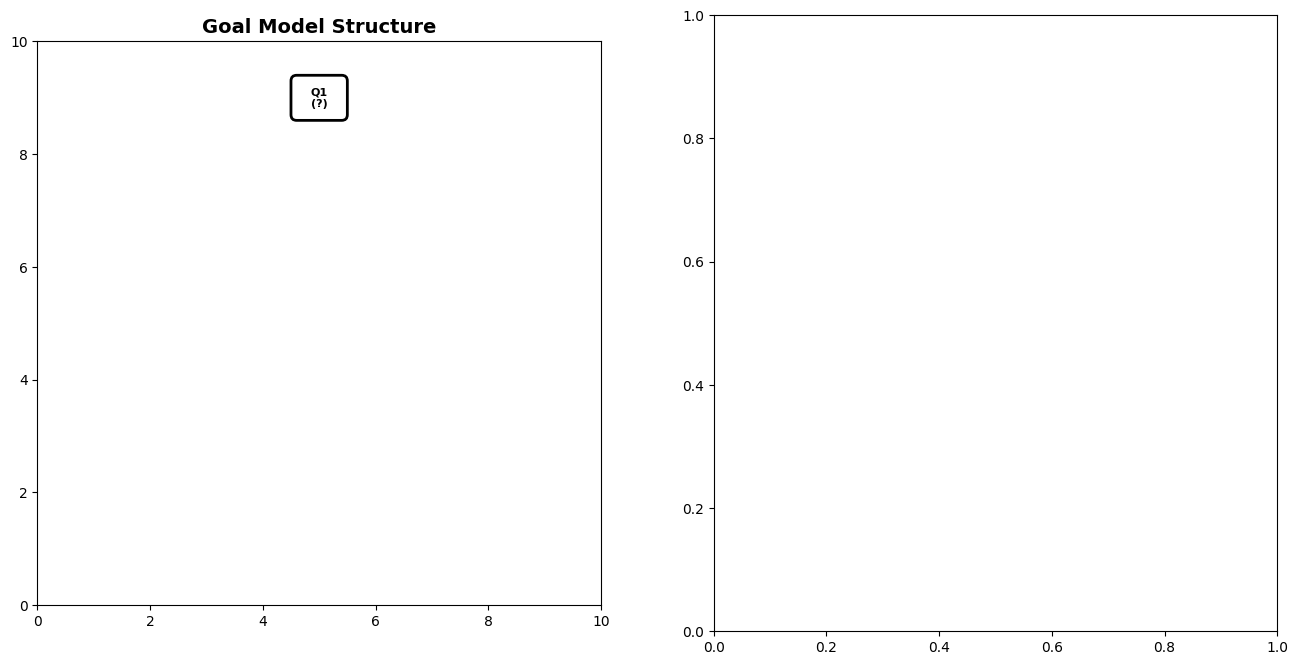

In [7]:
# Cell 5: Interactive Controls 
def create_interactive_controls():
    """Create interactive controls that use your GoalModel's process_event method"""
    
    # Process transition dropdown using your actual event mappings
    process_dropdown = widgets.Dropdown(
        options=list(model.event_mapping.keys()),
        value=list(model.event_mapping.keys())[0],
        description='Event:',
        disabled=False,
    )
    
    # Execute button
    execute_button = widgets.Button(
        description='Execute Event',
        disabled=False,
        button_style='success',
        tooltip='Execute the selected event using your process_event method'
    )
    
    # Reset button
    reset_button = widgets.Button(
        description='Reset Model',
        disabled=False,
        button_style='warning',
        tooltip='Reset the model to initial state'
    )
    
    # Output areas
    trace_output = widgets.Output()
    status_output = widgets.Output()
    viz_output = widgets.Output()
    
    def execute_event(b):
        """Execute selected event using your GoalModel's process_event method"""
        with status_output:
            clear_output(wait=True)
            selected_event = process_dropdown.value
            
            print(f"🚀 Executing event: {selected_event}")
            
            # Use your actual process_event method
            model.process_event(selected_event)
            
            print(f"✅ Event {selected_event} processed!")
            
            # Show current quality status using your model's data
            print("\n📊 Current Status:")
            for quality_id, status in model.qualities.items():
                formatted_status = model._format_status(status)
                print(f"🎯 {quality_id}: {formatted_status}")
        
        update_trace_display()
        update_visualization()
    
    def reset_model(b):
        """Reset the model using your create_model logic"""
        global model
        model = create_model_hubert()
        
        with status_output:
            clear_output(wait=True)
            print("🔄 Model reset to initial state using your logic")
        
        with trace_output:
            clear_output(wait=True)
            print("📋 Event sequence: []")
        
        update_visualization()
    
    def update_trace_display():
        """Update the trace display"""
        with trace_output:
            clear_output(wait=True)
            # You can access execution history through your model if available
            # For now, we'll show the current state
            print("📋 Current Model State:")
            print(f"📈 Execution counts: {model.execution_count}")
    
    def update_visualization():
        """Update the visualization using your model data"""
        with viz_output:
            clear_output(wait=True)
            fig = create_goal_model_visualization()
            plt.show()
            plt.close()
    
    # Connect event handlers
    execute_button.on_click(execute_event)
    reset_button.on_click(reset_model)
    
    # Create layout
    controls = widgets.HBox([process_dropdown, execute_button, reset_button])
    
    # Initial displays
    update_trace_display()
    update_visualization()
    
    return controls, trace_output, status_output, viz_output

# Create and display controls
controls, trace_out, status_out, viz_out = create_interactive_controls()

print("Interactive controls created using your GoalModel!")

In [8]:

# Cell 7: Trace and Evolution Visualization Functions
def create_trace_visualization():
    """Create horizontal trace timeline showing only events"""
    trace_output = widgets.Output()
    
    # Global variable to track executed events
    if not hasattr(create_trace_visualization, 'executed_events'):
        create_trace_visualization.executed_events = []
    
    def update_trace_display():
        with trace_output:
            clear_output(wait=True)
            
            # Create horizontal trace timeline
            trace_html = """
            <div style='border: 2px solid #ccc; padding: 15px; margin: 10px; background-color: #f9f9f9;'>
            <h3>Trace Execution Timeline</h3>
            """
            
            if not create_trace_visualization.executed_events:
                trace_html += "<p>No events executed yet. Select an event and click 'Execute Event' to start.</p>"
            else:
                # Create horizontal event sequence
                trace_html += "<div style='display: flex; align-items: center; gap: 10px; font-size: 18px; font-weight: bold;'>"
                trace_html += "<span style='color: #666;'>trace ⟨</span>"
                
                for i, event in enumerate(create_trace_visualization.executed_events):
                    if i > 0:
                        trace_html += "<span style='color: #666;'>,</span>"
                    trace_html += f"<span style='color: #2E86AB; margin: 0 5px;'>{event}</span>"
                
                trace_html += "<span style='color: #666;'>⟩</span>"
                trace_html += "</div>"
            
            trace_html += "</div>"
            display(HTML(trace_html))
    
    return trace_output, update_trace_display

def create_evolution_visualization():
    """Create evolution view showing vertical columns for each executed event with process transitions and mappings"""
    evolution_output = widgets.Output()
    
    def update_evolution_display():
        with evolution_output:
            clear_output(wait=True)
            
            if not create_trace_visualization.executed_events:
                display(HTML("<p>No evolution to display yet.</p>"))
                return
            
            # Get all model elements
            all_elements = []
            # Add all tasks
            for task_id in sorted(model.tasks.keys()):
                all_elements.append(task_id)
            # Add all goals  
            for goal_id in sorted(model.goals.keys()):
                all_elements.append(goal_id)
            # Add all qualities
            for quality_id in sorted(model.qualities.keys()):
                all_elements.append(quality_id)
            
            # Get all process transitions
            all_process_transitions = list(model.event_mapping.keys())
            
            # Create evolution view
            evolution_html = """
            <div style='border: 2px solid #ccc; padding: 15px; margin: 10px; background-color: #f9f9f9;'>
            <h3>Evolution View</h3>
            <div style='display: flex; gap: 20px; overflow-x: auto; padding: 10px;'>
            """
            
            for event in create_trace_visualization.executed_events:
                # Create column for each event
                evolution_html += f"""
                <div style='border: 1px solid #ddd; padding: 10px; min-width: 180px; background-color: white; border-radius: 5px;'>
                    <div style='text-align: center; font-weight: bold; margin-bottom: 5px; padding: 5px; background-color: #e6e6e6; border-radius: 3px;'>{event}</div>
                    <div style='text-align: center; font-size: 16px; margin-bottom: 10px;'>↓</div>
                    
                    <div style='display: flex; gap: 15px;'>
                        <!-- Process Transitions Column -->
                        <div style='flex: 1; text-align: center;'>
                            <div style='font-weight: bold; font-size: 10px; margin-bottom: 5px; color: #666;'>Process</div>
                """
                
                # Get mapping for this event
                targets = model.event_mapping.get(event, [])
                if isinstance(targets[0], list):
                    mapped_elements = targets[0]
                else:
                    mapped_elements = [targets[0]] if targets else []
                
                # Show all process transitions in first column
                for i, process_trans in enumerate(sorted(all_process_transitions)):
                    # Check if this process transition is the current event
                    if process_trans == event:
                        # Current event - show in green
                        square_color = 'lightgreen'
                    else:
                        # Other process transitions - show in white
                        square_color = 'white'
                    
                    evolution_html += f"""
                    <div id='proc_{event}_{process_trans}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                        <div style='width: 25px; height: 20px; background-color: {square_color}; 
                                   border: 1px solid #333; border-radius: 3px;
                                   display: flex; align-items: center; justify-content: center;'>
                            <span style='font-size: 8px; font-weight: bold;'>{process_trans}</span>
                        </div>
                    </div>
                    """
                
                evolution_html += """
                        </div>
                        
                        <!-- Goals/Tasks/Qualities Column -->
                        <div style='flex: 1; text-align: center;'>
                            <div style='font-weight: bold; font-size: 10px; margin-bottom: 5px; color: #666;'>Elements</div>
                """
                
                # Show all elements in second column
                for i, element in enumerate(all_elements):
                    # Check if this element is mapped to current event
                    if element in mapped_elements:
                        # Element is mapped - use actual status color
                        color = get_status_color_from_your_model(element)
                        is_mapped = True
                    else:
                        # Element is not mapped - show white
                        color = 'white'
                        is_mapped = False
                    
                    # Create shape based on element type
                    if element.startswith('T'):
                        # Task - hexagon
                        if color == 'white':
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 20px; height: 20px; background-color: white; 
                                           border: 1px solid #333; border-radius: 50%;
                                           display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                        else:
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 25px; height: 18px; background-color: {color}; 
                                           clip-path: polygon(25% 0%, 75% 0%, 100% 50%, 75% 100%, 25% 100%, 0% 50%);
                                           border: 1px solid #333; display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                    elif element.startswith('G'):
                        # Goal - ellipse
                        if color == 'white':
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 20px; height: 20px; background-color: white; 
                                           border: 1px solid #333; border-radius: 50%;
                                           display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                        else:
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 28px; height: 20px; background-color: {color}; 
                                           border-radius: 50%; border: 1px solid #333; 
                                           display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                    elif element.startswith('Q'):
                        # Quality - cloud
                        if color == 'white':
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 20px; height: 20px; background-color: white; 
                                           border: 1px solid #333; border-radius: 50%;
                                           display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                        else:
                            shape_html = f"""
                            <div id='elem_{event}_{element}_{i}' style='margin: 3px 0; display: flex; justify-content: center;'>
                                <div style='width: 28px; height: 18px; background-color: {color}; 
                                           border-radius: 15px; border: 1px solid #333; 
                                           display: flex; align-items: center; justify-content: center;'>
                                    <span style='font-size: 7px; font-weight: bold;'>{element}</span>
                                </div>
                            </div>
                            """
                    
                    evolution_html += shape_html
                
                evolution_html += """
                        </div>
                    </div>
                """
                
                # Add dotted lines for mappings using CSS
                if mapped_elements:
                    evolution_html += """
                    <style>
                    .mapping-line {
                        position: relative;
                    }
                    .mapping-line::after {
                        content: '';
                        position: absolute;
                        left: 50%;
                        top: 50%;
                        width: 40px;
                        height: 1px;
                        background: repeating-linear-gradient(to right, #333 0, #333 3px, transparent 3px, transparent 6px);
                        transform: translate(-50%, -50%);
                    }
                    </style>
                    """
                    
                    # Add visual indication of mapping
                    evolution_html += f"""
                    <div style='text-align: center; margin-top: 10px; font-size: 10px; color: #666;'>
                        Mapping: {event} ↔ {', '.join(mapped_elements)}
                    </div>
                    """
                
                evolution_html += "</div>"  # Close column
            
            evolution_html += "</div></div>"  # Close evolution view
            display(HTML(evolution_html))
    
    return evolution_output, update_evolution_display

def create_dual_model_visualization():
    """Create side-by-side goal model and process model visualization"""
    viz_output = widgets.Output()
    
    def update_dual_visualization():
        with viz_output:
            clear_output(wait=True)
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
            
            # Left side: Goal Model
            ax1.set_title("Goal Model Structure", fontsize=16, fontweight='bold', pad=20)
            ax1.set_xlim(0, 10)
            ax1.set_ylim(0, 12)
            ax1.set_aspect('equal')
            
            # Define positions for goal model elements
            positions = {
                'Q1': (5, 10.5),
                'G1': (2, 8.5), 'G2': (5, 8.5), 'G3': (8, 8.5),
                'T1': (1, 6), 'T2': (2.5, 6), 'T3': (4, 6), 'T4': (5.5, 6),
                'T5': (7, 6), 'T6': (1, 3.5), 'T7': (3, 3.5), 'T8': (8, 3.5)
            }
            
            # Draw goal model elements
            for element_id, (x, y) in positions.items():
                color = get_status_color_from_your_model(element_id)
                                
                if element_id.startswith('Q'):
                    # Quality - cloud shape
                    cloud = FancyBboxPatch((x-0.6, y-0.4), 1.2, 0.8, 
                                         boxstyle="round,pad=0.15", 
                                         facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(cloud)
                    status_text = f"{element_id}\n{model._format_status(model.qualities[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=10)
                elif element_id.startswith('G'):
                    # Goal - ellipse
                    ellipse = patches.Ellipse((x, y), 1.0, 0.6, 
                                            facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(ellipse)
                    status_text = f"{element_id}\n{model._format_status(model.goals[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=10)
                else:
                    # Task - hexagon
                    hexagon = patches.RegularPolygon((x, y), 6, radius=0.5, 
                                                  facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(hexagon)
                    status_text = f"{element_id}\n{model._format_status(model.tasks[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=9)
            
            # Draw links in goal model
            for parent, child, link_type, status in model.links:
                if parent in positions and child in positions:
                    px, py = positions[parent]
                    cx, cy = positions[child]
                    
                    if link_type == LinkType.MAKE:
                        arrow_color = 'green'
                        style = '->'
                    elif link_type == LinkType.BREAK:
                        arrow_color = 'red'
                        style = '->'
                    elif link_type == LinkType.AND:
                        arrow_color = 'blue'
                        style = '->'
                    else:
                        arrow_color = 'yellow'
                        style = '->'
                    
                    ax1.annotate('', xy=(cx, cy), xytext=(px, py),
                                arrowprops=dict(arrowstyle=style, color=arrow_color, lw=2))
            
            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.grid(True, alpha=0.3)
            
            # Right side: Process Model
            ax2.set_title("Process Model & Event Mappings", fontsize=16, fontweight='bold', pad=20)
            ax2.set_xlim(0, 10)
            ax2.set_ylim(0, 12)
            
            # Draw process model as a sequence
            events = list(model.event_mapping.keys())
            y_positions = [10, 8.5, 7, 5.5, 4, 2.5, 1, 0.5]  # Different heights for visual appeal
            
            for i, event in enumerate(events):
                if i < len(y_positions):
                    x_pos = 2
                    y_pos = y_positions[i]
                    
                    # Process transition as rectangle
                    rect = FancyBboxPatch((x_pos-0.4, y_pos-0.25), 0.8, 0.5,
                                        boxstyle="round,pad=0.05",
                                        facecolor='lightgray', edgecolor='black', linewidth=2)
                    ax2.add_patch(rect)
                    ax2.text(x_pos, y_pos, event, ha='center', va='center', fontweight='bold', fontsize=12)
                    
                    # Show mapping with arrow
                    targets = model.event_mapping[event]
                    if isinstance(targets[0], list):
                        target_str = ', '.join(targets[0])
                    else:
                        target_str = targets[0][0] if isinstance(targets[0], list) else str(targets[0])
                    
                    # Arrow pointing to mapping
                    ax2.annotate('', xy=(x_pos + 1.5, y_pos), xytext=(x_pos + 0.5, y_pos),
                                arrowprops=dict(arrowstyle='->', color='black', lw=2))
                    
                    # Target box
                    target_rect = FancyBboxPatch((x_pos + 1.5, y_pos-0.2), 2.5, 0.4,
                                               boxstyle="round,pad=0.05",
                                               facecolor='lightyellow', edgecolor='gray')
                    ax2.add_patch(target_rect)
                    ax2.text(x_pos + 2.75, y_pos, target_str, ha='center', va='center', fontsize=10)
            
            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            plt.close()
    
    return viz_output, update_dual_visualization

🚀 Interactive interface ready!
💡 This notebook uses your actual code files:
   - /Users/huba/tmp/Kogi-Python/Implementation/enums.py
   - /Users/huba/tmp/Kogi-Python/Implementation/goal_model.py
👆 Use the interface above to interact with your GoalModel!


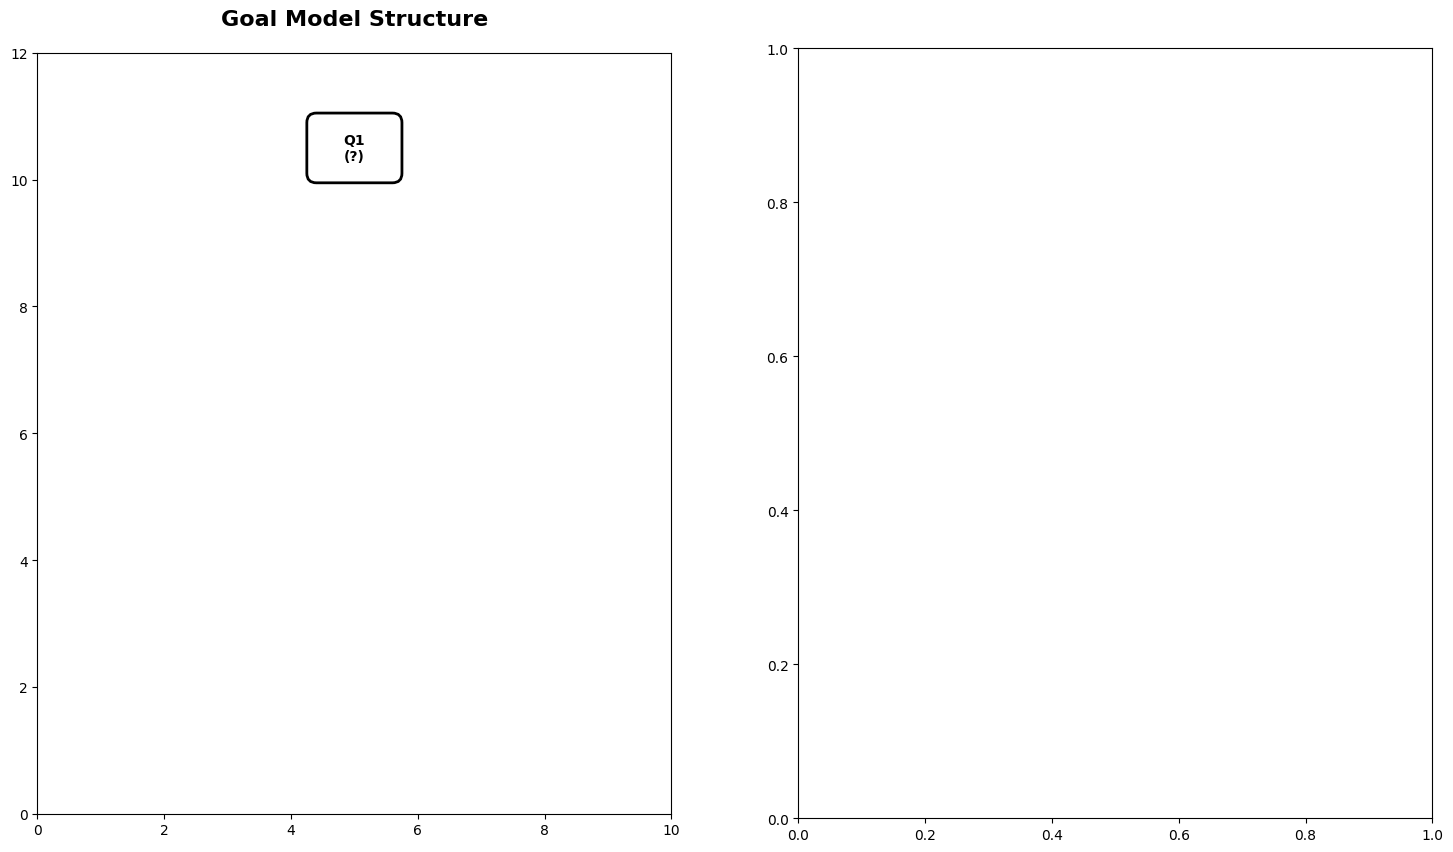

In [9]:
# Cell 8: Main Interface with New Layout
def display_interface():
    """Display the interface with trace timeline and dual model view"""
    
    # Header
    header = widgets.HTML(f"""
    <div style='text-align: center; margin-bottom: 20px;'>
        <h1 style='color: #2E86AB; margin-bottom: 10px;'>🎯 Interactive Goal Model Evaluation</h1>
        <p style='font-size: 14px; color: #666;'>Using your actual GoalModel class from: {implementation_path}</p>
    </div>
    """)
    
    # Legend - more compact
    legend = widgets.HTML("""
    <div style='background-color: #f0f0f0; padding: 10px; border-radius: 5px; margin-bottom: 15px; font-size: 12px; border: 1px solid #ccc;'>
    <div style='font-weight: bold; margin-bottom: 8px; text-align: center;'>Conventions</div>
    <div><strong>Colors:</strong> 🤍 Unknown | 🟢 Satisfied/Fulfilled | 🔵 Executed Pending | 🔴 Denied</div>
    <div><strong>Shapes:</strong> ☁️ Quality | ⭕ Goal | ⬡ Task | ⬜ Process Transition</div>
    </div>
    """)
    
    # Controls section
    controls_section = widgets.VBox([
        widgets.HTML("<h3>Controls</h3>"),
        controls,
        status_out
    ])
    
    # Create trace and dual visualization
    trace_out_new, update_trace = create_trace_visualization()
    evolution_out, update_evolution = create_evolution_visualization()
    dual_viz_out, update_dual_viz = create_dual_model_visualization()
    
    # Modified execute function to update all displays
    def execute_event_with_trace(b):
        """Execute event and update all displays"""
        selected_event = controls.children[0].value  # Get dropdown value
        
        with status_out:
            clear_output(wait=True)
            print(f"🚀 Executing event: {selected_event}")
            
            # Add to trace
            create_trace_visualization.executed_events.append(selected_event)
            
            # Use your actual process_event method
            model.process_event(selected_event)
            
            print(f"✅ Event {selected_event} processed!")
            
            # Show current quality status
            print("\n📊 Current Status:")
            for quality_id, status in model.qualities.items():
                formatted_status = model._format_status(status)
                print(f"🎯 {quality_id}: {formatted_status}")
        
        # Update all displays
        update_trace()
        update_evolution()
        update_dual_viz()
    
    def reset_model_with_trace(b):
        """Reset model and clear trace"""
        global model
        model = create_model_hubert()
        create_trace_visualization.executed_events = []
        
        with status_out:
            clear_output(wait=True)
            print("🔄 Model and trace reset to initial state")
        
        update_trace()
        update_evolution()
        update_dual_viz()
    
    # Clear any existing event handlers to prevent duplicates
    controls.children[1]._click_handlers.callbacks.clear()  # Execute button
    controls.children[2]._click_handlers.callbacks.clear()  # Reset button
    
    # Connect new event handlers
    controls.children[1].on_click(execute_event_with_trace)  # Execute button
    controls.children[2].on_click(reset_model_with_trace)    # Reset button
    
    # Create main tab structure
    main_tab = widgets.Tab()
    
    # Main tab content with trace timeline, evolution view, and dual models
    main_content = widgets.VBox([
        controls_section,
        trace_out_new,
        widgets.HTML("<h3>Evolution View</h3>"),
        evolution_out,
        widgets.HTML("<h3>Model Views</h3>"),
        dual_viz_out
    ])
    
    # Statistics tab (simplified)
    # stats_content = create_statistics_view()
    
    # main_tab.children = [main_content, stats_content]
    main_tab.children = [main_content]
    main_tab.set_title(0, 'Main Interface')
    # main_tab.set_title(1, 'Statistics')
    
    # Initial visualization
    update_trace()
    update_evolution()
    update_dual_viz()
    
    # Complete interface
    interface = widgets.VBox([
        header,
        legend,
        main_tab
    ])
    
    return interface

# Display the complete interface
interface = display_interface()
display(interface)

print("🚀 Interactive interface ready!")
print("💡 This notebook uses your actual code files:")
print(f"   - {implementation_path}/enums.py")
print(f"   - {implementation_path}/goal_model.py")
print("👆 Use the interface above to interact with your GoalModel!")